In [1]:
# Import the basic libraries for file handlings and data preprocessings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Access the dataset
df = pd.read_excel("Data set.xlsx","customer data")

In [3]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
df.shape

(48842, 15)

In [5]:
# NULL values checking
df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [6]:
# eliminates the NULL values
df["workclass"] = df["workclass"].bfill()
df["occupation"] = df["occupation"].bfill()
df["native-country"] = df["native-country"].bfill()
df["income"] = df["income"].replace('>50K.', '>50K')
df["income"] = df["income"].replace('<=50K.', '<=50K')

In [7]:

df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [8]:
# Feature  selections for x_train and y_train 
x=df.drop("income",axis=1)

In [9]:
x.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [10]:
y=df["income"]

In [11]:
y

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
48837    <=50K
48838    <=50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 48842, dtype: object

In [12]:
# Sklearn packages for building a model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [13]:
# Encoding the required columns
le = LabelEncoder()
y=le.fit_transform(y)

In [14]:
y

array([0, 0, 0, ..., 0, 0, 1])

In [15]:
x=pd.get_dummies(x,columns=['workclass','education','occupation','marital-status','race'
                                  ,'native-country','relationship'],dtype=int)

In [16]:
x["sex"]=le.fit_transform(x["sex"])

In [17]:
# Train Test data splitting
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# KNN Model

In [18]:
KNN=KNeighborsClassifier(n_neighbors=10)
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [19]:
pred = KNN.predict(x_test)

In [20]:
pred

array([0, 1, 0, ..., 0, 0, 0])

In [21]:
con = confusion_matrix(y_test,pred)
con

array([[7155,  206],
       [1825,  583]], dtype=int64)

In [22]:
accuracy_score(y_test,pred)

0.7920974511208926

Text(58.222222222222214, 0.5, 'Truth')

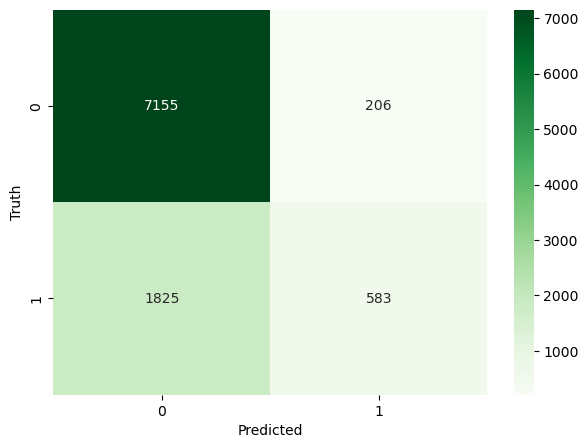

In [23]:
plt.figure(figsize=(7,5))
sns.heatmap(con, annot=True, fmt='g', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# K-Means Model

In [24]:
from sklearn.cluster import KMeans

In [25]:
s=[]
k_range = range(1,10)
for k in k_range:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(x)
    s.append(kmeans.inertia_)

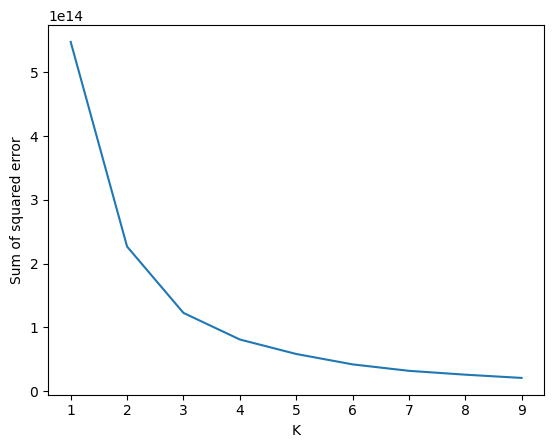

In [26]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,s)

In [27]:
kmeans = KMeans(n_clusters=3)
pred = kmeans.fit_predict(x)

In [28]:
pred

array([2, 2, 0, ..., 1, 2, 0])

In [29]:
accuracy_score(y,pred)

0.4044674665247123

# SUPPORT VECTOR MACHINE Model

In [30]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [31]:
pred = svc.predict(x_test)

In [32]:
pred

array([0, 1, 0, ..., 0, 0, 0])

In [33]:
accuracy_score(y_test,pred)

0.7936329204626881

In [34]:
con = confusion_matrix(y_test,pred)
con

array([[7341,   20],
       [1996,  412]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

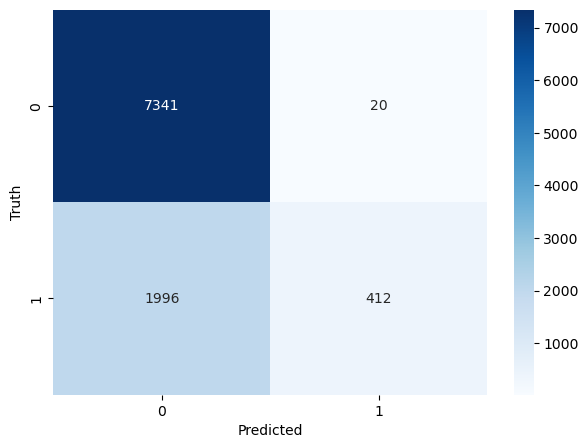

In [35]:
plt.figure(figsize=(7,5))
sns.heatmap(con, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Decision Tree Model

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [37]:
decision = DecisionTreeClassifier(criterion="entropy",max_depth=2)
decision.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [38]:
pred=decision.predict(x_test)
pred

array([0, 1, 0, ..., 1, 0, 0])

In [39]:
accuracy_score(y_test,pred)

0.8223973794656567

In [40]:
con=confusion_matrix(y_test,pred)
con

array([[6892,  469],
       [1266, 1142]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

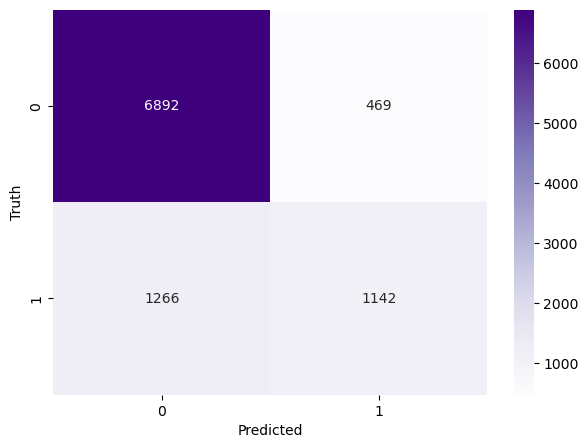

In [41]:
plt.figure(figsize=(7,5))
sns.heatmap(con, annot=True, fmt='g', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Truth')

[Text(0.5, 0.8333333333333334, 'x[49] <= 0.5\nentropy = 0.791\nsamples = 39073\nvalue = [29794, 9279]'),
 Text(0.25, 0.5, 'x[4] <= 7055.5\nentropy = 0.34\nsamples = 21209\nvalue = [19866.0, 1343.0]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.275\nsamples = 20846\nvalue = [19857, 989]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.168\nsamples = 363\nvalue = [9, 354]'),
 Text(0.75, 0.5, 'x[2] <= 11.5\nentropy = 0.991\nsamples = 17864\nvalue = [9928, 7936]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.904\nsamples = 12016\nvalue = [8171.0, 3845.0]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.882\nsamples = 5848\nvalue = [1757.0, 4091.0]')]

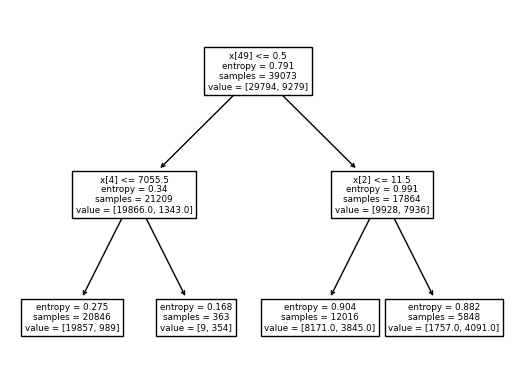

In [42]:
tree.plot_tree(decision)

# RANDOM FOREST Model

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [45]:
rfc_pred=rfc.predict(x_test)

In [46]:
accuracy_score(y_test,rfc_pred)

0.8483979936533934

In [47]:
rfc_con=confusion_matrix(y_test,rfc_pred)
rfc_con

array([[6795,  566],
       [ 915, 1493]], dtype=int64)